# 모바일 게임 리뷰 데이터 분석
> 머닝 러신(devkobert@gmail.com)

## 0. Install dependencies

In [ ]:
!pip install kss
!pip install soyspacing
!pip install soynlp
!pip install emoji
!pip install gensim
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install pyLDAvis

     |████████████████████████████████| 42.4 MB 2.1 MB/s 
     |████████████████████████████████| 184 kB 57.6 MB/s 
  Created wheel for kss: filename=kss-3.2.0-py3-none-any.whl size=42447995 sha256=f074bb5437fce3bbee40f20a957c435d3f47a22db7483bbef6d92528fdf065ea
  Stored in directory: /root/.cache/pip/wheels/a1/47/9c/a5f83b5ab6096e3c4a33643fc553b26098c23e72b6539b86f4
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=cf5b489b67cd339e1196f9f35ebd34179530600761d36cf1b951d0376a5b84ad
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully built kss emoji
     |████████████████████████████████| 416 kB 14.4 MB/s 
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-n8qbipdd
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-n8qbipdd
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=ef1125b01b4fa82

     |████████████████████████████████| 1.7 MB 12.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 43.6 MB/s 
     |████████████████████████████████| 15.7 MB 70.8 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=d32df5dfc0fd110a94a919a8e1bf2e4949242fbd661fce5791dd92224ef33143
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take i

#### - mecab 설정

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Installing automake (A dependency for mecab-ko)
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.

#### - 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import kss #문장분리
#from pykospacing import Spacing
from hanspell import spell_checker
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt, Mecab
from konlpy.utils import pprint
import torch
import requests

#from pprint import pprint
 
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
 
# spacy for lemmatization
import spacy
 
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt

[Korean Sentence Splitter]: Initializing Kss...
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData.csv', encoding='utf-8-sig')
comment = df[['Comment', 'App Name']] #comment = list(df['Comment'])

In [ ]:
comment

AttributeError: ignored

                                                 Comment     App Name
0      첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...  오딘: 발할라 라이징
1      모바일 게임 그동안 참 많이 했는데... 다른 게임들은 그나마 실행후 플레이 하면서...  오딘: 발할라 라이징
2      제2랑 차이보면 카툰과 실사느낌차이. 캐릭터 커스터마이징 비슷함. 이직 초반이지만 ...  오딘: 발할라 라이징
3      자 자 어떤게임인지 간단히 소개해드릴께요. 전사 궁수 법사 힐러 고르세요. 화려한그...  오딘: 발할라 라이징
4      문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...  오딘: 발할라 라이징
...                                                  ...          ...
10523                                    차고로 들어가면 게임이 멈춤        Rider
10524                               응 개똥게임 차선택이안된고클릭도 안되        Rider
10525                                      눈동자 지 너무 잘 먹고        Rider
10526                     그냥그대로멈추는데? 와 버그대박 불상해서 많ㅇㄱ드릴게요        Rider
10527                                   광고진짜싫어진짜똥깸인데 재밌음        Rider

[10528 rows x 2 columns]

## 1. 데이터 전처리

In [ ]:
s = [] #리뷰가 담길 리스트

#### 문장끼리 띄어쓰기

In [ ]:
spacing = Spacing()
for sentense in comment['Comment']:
    for st in kss.split_sentences(sentense):        
        s.append(st)

#### 특수문자 제거

In [ ]:
punct = "/-'?!.,#$%\'*+-/:;<=>@\\^_`|~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&' #괄호를 제외한 특수문자 제거

In [ ]:
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

In [ ]:
def clean_punc(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text.strip()

In [ ]:
cs = [] # cleaned sentense
for sentense in s:
    cs.append(clean_punc(sentense, punct, punct_mapping))

In [ ]:
np.size(comment['Comment'])

10528

In [ ]:
comment['Comment'][1]

'모바일 게임 그동안 참 많이 했는데 .  .  .  다른 게임들은 그나마 실행후 플레이 하면서 ,  좋고 나쁨의 상태를 알수 있었는데 .  . 이겜은 플레이 해보는거 자체가 하늘의 별 따기임 .  .  직장인은 대기만 타다 하루 보내고 ,  그나마 할수 있더라도 저녁에 접해서 하더라도 역시나 있는 변신 시스템 .  .  말장난으로 끝나는 아바타 .  .  엠소모도 너무 심해서 퀘 2 ~ 3개면 끝 .  .  .  그나마 그래픽 하나는 좋다는것뿐 .  .  .  역대 현질 심하다는 리니지 보다 .  .  떨어지고 .  .  다른 게임 하는게 마음 편할듯 합니다 .  .  .'

In [ ]:
for i in range(np.size(comment['Comment'])):
    comment['Comment'][i] = clean_punc(comment['Comment'].at[i], punct, punct_mapping)

In [ ]:
comment

,Comment,App Name
0,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,오딘: 발할라 라이징
1,모바일 게임 그동안 참 많이 했는데 . . . 다른 게임들은 그나마 실행후 플...,오딘: 발할라 라이징
2,제2랑 차이보면 카툰과 실사느낌차이 . 캐릭터 커스터마이징 비슷함 . 이직 초반...,오딘: 발할라 라이징
3,자 자 어떤게임인지 간단히 소개해드릴께요 . 전사 궁수 법사 힐러 고르세요 . ...,오딘: 발할라 라이징
4,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,오딘: 발할라 라이징
...,...,...
10523,차고로 들어가면 게임이 멈춤,Rider
10524,응 개똥게임 차선택이안된고클릭도 안되,Rider
10525,눈동자 지 너무 잘 먹고,Rider
10526,그냥그대로멈추는데 ? 와 버그대박 불상해서 많ㅇㄱ드릴게요,Rider


#### 기타 전처리

In [ ]:
copy = comment.copy()
copy

,Comment,App Name
0,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,오딘: 발할라 라이징
1,모바일 게임 그동안 참 많이 했는데 . . . 다른 게임들은 그나마 실행후 플...,오딘: 발할라 라이징
2,제2랑 차이보면 카툰과 실사느낌차이 . 캐릭터 커스터마이징 비슷함 . 이직 초반...,오딘: 발할라 라이징
3,자 자 어떤게임인지 간단히 소개해드릴께요 . 전사 궁수 법사 힐러 고르세요 . ...,오딘: 발할라 라이징
4,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,오딘: 발할라 라이징
...,...,...
10523,차고로 들어가면 게임이 멈춤,Rider
10524,응 개똥게임 차선택이안된고클릭도 안되,Rider
10525,눈동자 지 너무 잘 먹고,Rider
10526,그냥그대로멈추는데 ? 와 버그대박 불상해서 많ㅇㄱ드릴게요,Rider


In [ ]:
import re

def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        # review = re.sub(r'\d+','', str(texts[i])) # remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [ ]:
cs = clean_text(cs)

In [ ]:
copy['Comment'] = clean_text(copy['Comment'])
copy

,Comment,App Name
0,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,오딘: 발할라 라이징
1,모바일 게임 그동안 참 많이 했는데 다른 게임들은 그나마 실행후 플레이 하면서 좋고...,오딘: 발할라 라이징
2,제2랑 차이보면 카툰과 실사느낌차이 캐릭터 커스터마이징 비슷함 이직 초반이지만 트라...,오딘: 발할라 라이징
3,자 자 어떤게임인지 간단히 소개해드릴께요 전사 궁수 법사 힐러 고르세요 화려한그래픽...,오딘: 발할라 라이징
4,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋㅋㅋㅋㅋ 파괴 당하고 바로 삭제 ...,오딘: 발할라 라이징
...,...,...
10523,차고로 들어가면 게임이 멈춤,Rider
10524,응 개똥게임 차선택이안된고클릭도 안되,Rider
10525,눈동자 지 너무 잘 먹고,Rider
10526,그냥그대로멈추는데 와 버그대박 불상해서 많ㅇㄱ드릴게요,Rider


In [ ]:
from soynlp.normalizer import *
import emoji 

texts_noemoji = []
def clean_etc(texts):
  for i in range(0, len(texts)):
    sent = emoticon_normalize(texts[i], num_repeats=2) #ㅠㅠㅠ의 경우 ㅠㅠ로 축약
    sent = emoji.demojize(sent) #이모티콘을 :이모티콘 이름:의 형식으로 변환
    sent_noemoji = re.sub("[:].*[:]", ' ', sent) #:~:를 제거함
    texts_noemoji.append(sent_noemoji)
  return texts_noemoji

In [ ]:
cs = clean_etc(cs)

In [ ]:
copy['Comment'] = clean_etc(copy['Comment'])

In [ ]:
copy

,Comment,App Name
0,첫날에 결제를 하고 꾸준히 소소하게 즐기려고 했으나 대기열이 많아 접속자체를 할수가...,오딘: 발할라 라이징
1,모바일 게임 그동안 참 많이 했는데 다른 게임들은 그나마 실행후 플레이 하면서 좋고...,오딘: 발할라 라이징
2,제2랑 차이보면 카툰과 실사느낌차이 캐릭터 커스터마이징 비슷함 이직 초반이지만 트라...,오딘: 발할라 라이징
3,자 자 어떤게임인지 간단히 소개해드릴께요 전사 궁수 법사 힐러 고르세요 화려한그래픽...,오딘: 발할라 라이징
4,문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋ 파괴 당하고 바로 삭제 현질 유...,오딘: 발할라 라이징
...,...,...
10523,차고로 들어가면 게임이 멈춤,Rider
10524,응 개똥게임 차선택이안된고클릭도 안되,Rider
10525,눈동자 지 너무 잘 먹고,Rider
10526,그냥그대로멈추는데 와 버그대박 불상해서 ㅇㄱ릴게요,Rider


In [ ]:
cs = cs[8:] # 열 이름 삭제
cs

['제2랑 차이보면 카툰과 실사느낌차이 캐릭터 커스터마이징 비슷함 이직 초반이지만 트라하 게임이랑 비슷하면서도 검은사막에는 못 미친다는 느낌 그래픽도 좋긴한데 검은사막 따라하다',
 '트라하보다 못한 화면연출 프래임 아니 제2보다 못하다는 소리를 들을수도 있어요',
 '성급하지만 그냥 리레2 느낌이 너무나요',
 '아직 제2는 무난하네요',
 '오래가길 원하신다면 과금에 신경 써주시면 감사하죠',
 '수고하셨습니다',
 '자 자 어떤게임인지 간단히 소개해드릴께요',
 '전사 궁수 법사 힐러 고르세요',
 '화려한그래픽으로시작합니다',
 '갓게임 god이 나옵니다 일단 퀘따라자동이동을 시작하죠',
 '기능이 한개씩 오픈됩니다',
 '자동사냥도 가능합니다',
 '퀘스트 자동 이동도됩니다',
 '미미르라고 경치 골드 버프도있죠',
 '피로도처럼 깍입니다',
 '동전넣고 충전가능합니다 탈것두줍니다',
 '리 지 변신처럼 아바타도 줍니다',
 '직업별로 나누어져요',
 '경험치 슬슬 안오르고 딜부족하다 느끼시면 과금10만원정도하시면 뽑기도 신나게 뽑을수있어요',
 '희귀템 뽑으시면 조금 쎄집니다',
 '영웅급뽑으시면 공지도 떠요',
 '축하드려요',
 '스팀에서 압긍 오픈필드 rpg2 3개정도 살돈밖에안됩니다 월급받으시는데 이정도는 술값도안되잖아요 던전두 있구요',
 '자동 시스템 지원하는 단체결투장도있구요',
 '절벽올라가서 활강도해보세요',
 '바람이 시원해요',
 '아코 안보이는벽에 박음 더이상못가네 시작하고 하루지났는데 정겹고 지겹고 졸립고 그래요 별 반개는 안들어가지네요',
 '문장을 구매해서 강화하는데 무조건 실패시 파괴 ㅋㅋ 파괴 당하고 바로 삭제 현질 유도 아니라고 템 지르기 안된다고 했지만 문장이라는 게임에 지대한 영향을 끼치는 핵심 무구가 다이아로 판매중이며 고강 하려면 터무니없는 돈 필요합니다',
 '무과금으로 하면 마나 부족해서 허덕이는데 마나포션이 없어 미칠겁니다',
 '그래서 문장 구매하면 저강만 해야하는데 그럼 약해 빠졌구요',
 '솔직히 겁

## 2. 키워드 추출 (게임 관련 특정 단어 인식하도록 만들기)

#### 상위 키워드 100개 추출, 토크나이징

In [ ]:
okt = Okt()
def tokenizer(texts):
  token_cs = []
  for i in range(len(texts)):
    token_cs.append(okt.nouns(texts[i]))
  return token_cs

In [ ]:
token_cs = tokenizer(cs) #cs리스트의 명사만 담은 token_cs

In [ ]:
token_cs # Text Rank에서 사용

[['제',
  '차이',
  '카툰',
  '실사',
  '느낌',
  '차이',
  '캐릭터',
  '커스터',
  '마이',
  '징',
  '이직',
  '초반',
  '트라하',
  '게임',
  '사막',
  '못',
  '느낌',
  '그래픽',
  '사막'],
 ['트라하', '못', '화면', '연출', '프래', '임', '제', '소리'],
 ['그냥', '리레', '느낌', '요'],
 ['제', '무난'],
 ['과금', '신경'],
 ['수고'],
 ['자', '자', '게임', '소개'],
 ['전사', '궁수', '법사', '힐러'],
 ['그래픽', '시작'],
 ['게임', '이', '일단', '퀘', '이동', '시작'],
 ['기능', '개', '오픈'],
 ['자동', '사냥'],
 ['퀘스트', '자동', '이동'],
 ['미미르', '경치', '골드', '버프도있'],
 ['피로', '처럼'],
 ['동전', '충전', '탈것'],
 ['리', '변신', '아바타'],
 ['직업', '별로'],
 ['경험치', '슬슬', '딜', '과금', '뽑기'],
 ['희귀', '템', '조금'],
 ['영웅', '공지'],
 ['축하'],
 ['스팀', '압긍', '오픈', '필드', '개정', '살돈', '월급', '정도', '술값', '던전'],
 ['자동', '시스템', '지원', '단체', '결투'],
 ['절벽', '활강'],
 ['바람'],
 ['아코', '벽', '더', '이상', '못', '시작', '하루', '별', '반개'],
 ['문장',
  '구매',
  '무조건',
  '실패',
  '시',
  '파괴',
  '파괴',
  '바로',
  '삭제',
  '현질',
  '유도',
  '템',
  '문장',
  '게임',
  '지대',
  '영향',
  '핵심',
  '무',
  '구가',
  '다이아',
  '판매',
  '강',
  '터',
  '무니',
  '돈'],
 ['무', '과금', '마나', '마

In [ ]:
# 데이터프레임 형태를 유지하기 위하여 이중리스트 형태로 두글자 이상의 단어들만 담은 리스트 생성
w = [] # 리뷰의 모든 단어들을 담은 리스트
ns = []
for x in token_cs:
  for i in range(len(x)):
    if len(x[i]) > 1:
      n = x[i]
      ns.append(n)      
  w.append(ns)
  ns = []

In [ ]:
# 상위 키워드 100개 추출만 하기 위한 리스트, 리스트 하나의 형태로 두글자 이상의 단어들만 담은 리스트 생성
w = [] # 리뷰의 모든 단어들을 담은 리스트
for x in token_cs:
  for i in range(len(x)):
    if len(x[i]) > 1:
      n = x[i]
      w.append(n)

In [ ]:
w

['차이',
 '카툰',
 '실사',
 '느낌',
 '차이',
 '캐릭터',
 '커스터',
 '마이',
 '이직',
 '초반',
 '트라하',
 '게임',
 '사막',
 '느낌',
 '그래픽',
 '사막',
 '트라하',
 '화면',
 '연출',
 '프래',
 '소리',
 '그냥',
 '리레',
 '느낌',
 '무난',
 '과금',
 '신경',
 '수고',
 '게임',
 '소개',
 '전사',
 '궁수',
 '법사',
 '힐러',
 '그래픽',
 '시작',
 '게임',
 '일단',
 '이동',
 '시작',
 '기능',
 '오픈',
 '자동',
 '사냥',
 '퀘스트',
 '자동',
 '이동',
 '미미르',
 '경치',
 '골드',
 '버프도있',
 '피로',
 '처럼',
 '동전',
 '충전',
 '탈것',
 '변신',
 '아바타',
 '직업',
 '별로',
 '경험치',
 '슬슬',
 '과금',
 '뽑기',
 '희귀',
 '조금',
 '영웅',
 '공지',
 '축하',
 '스팀',
 '압긍',
 '오픈',
 '필드',
 '개정',
 '살돈',
 '월급',
 '정도',
 '술값',
 '던전',
 '자동',
 '시스템',
 '지원',
 '단체',
 '결투',
 '절벽',
 '활강',
 '바람',
 '아코',
 '이상',
 '시작',
 '하루',
 '반개',
 '문장',
 '구매',
 '무조건',
 '실패',
 '파괴',
 '파괴',
 '바로',
 '삭제',
 '현질',
 '유도',
 '문장',
 '게임',
 '지대',
 '영향',
 '핵심',
 '구가',
 '다이아',
 '판매',
 '무니',
 '과금',
 '마나',
 '마나',
 '포션',
 '문장',
 '구매',
 '광고',
 '전부일',
 '생각',
 '대감',
 '일단',
 '플레이',
 '게임',
 '메뉴',
 '보고',
 '리니지',
 '게임',
 '리스',
 '크기',
 '그래픽',
 '최상',
 '동네',
 '사막',
 '그레픽',
 '반도',
 '줄라',
 '느낌',
 '전투',
 '모션',


In [ ]:
from collections import Counter
counts = Counter(w)
tags = counts.most_common(100)
tags

[('게임', 7690),
 ('광고', 4823),
 ('진짜', 1351),
 ('유저', 1144),
 ('정말', 985),
 ('과금', 936),
 ('플레이', 886),
 ('사람', 880),
 ('시간', 872),
 ('계속', 869),
 ('업데이트', 825),
 ('현질', 799),
 ('생각', 786),
 ('캐릭터', 745),
 ('다시', 698),
 ('재미', 697),
 ('버그', 666),
 ('정도', 641),
 ('그냥', 594),
 ('추천', 591),
 ('처음', 588),
 ('하나', 562),
 ('시작', 550),
 ('문제', 546),
 ('조금', 540),
 ('다른', 486),
 ('때문', 486),
 ('레벨', 485),
 ('한번', 467),
 ('지금', 455),
 ('리뷰', 443),
 ('일단', 406),
 ('계정', 396),
 ('화면', 391),
 ('오류', 380),
 ('단점', 372),
 ('보상', 369),
 ('이건', 357),
 ('아이템', 357),
 ('제발', 353),
 ('접속', 350),
 ('로그인', 345),
 ('유도', 342),
 ('삭제', 339),
 ('진행', 328),
 ('보고', 320),
 ('모드', 319),
 ('와이파이', 318),
 ('추가', 316),
 ('서버', 312),
 ('해도', 309),
 ('확률', 298),
 ('뽑기', 297),
 ('이벤트', 297),
 ('친구', 297),
 ('갑자기', 292),
 ('스토리', 283),
 ('별로', 275),
 ('아주', 274),
 ('자체', 267),
 ('기능', 266),
 ('제작자', 264),
 ('그래픽', 263),
 ('시스템', 262),
 ('채팅', 257),
 ('완전', 253),
 ('이상', 251),
 ('중간', 250),
 ('쿠키', 246),
 ('느낌', 245),
 (

In [ ]:
# # 태그비교
# save = pd.DataFrame(data = tags, columns = ['검사 안한 태그', '총 발생 횟수'])
# save.to_csv('/content/drive/MyDrive/munning_rachine/dataset/tags.csv', encoding='utf-8-sig')

#### 워드클라우드
참고자료 : https://kimdingko-world.tistory.com/82

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path = '/content/drive/MyDrive/munning_rachine/wordcloud/CookieRunFont_TTF/CookieRun Regular.ttf', background_color='white',width=800, height=600) # 쿠키런 폰트
cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
from urllib import request
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np

custom_mask = np.array(Image.open('/content/drive/MyDrive/munning_rachine/wordcloud/Google Play.png'))

plt.figure(figsize=(8,8))
plt.imshow(custom_mask, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [ ]:
image_colors = ImageColorGenerator(custom_mask) # 마스크용 사진의 색을 입력

wordcloud = WordCloud(font_path= '/content/drive/MyDrive/munning_rachine/wordcloud/CookieRunFont_TTF/CookieRun Regular.ttf',
                     background_color='white',width=800, height=600,
                     max_words=100, mask=custom_mask, # word의 최대 갯수와 마스크, font-size설정
                     max_font_size=100)

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud.recolor(color_func=image_colors), interpolation='bilinear') # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

#### 키워드 임베딩 (with Embedding Projector)
참고자료 : https://soohee410.github.io/embedding_projector  
참고자료2 : https://word2vec.kr/search/ (분산 시멘틱 웹)

In [ ]:
from gensim.models import Word2Vec  
model = Word2Vec(w, size=100, window=5, min_count=5, workers=4, sg=0)  

from gensim.models import KeyedVectors  
#model.wv.save_word2vec_format('w2v')

In [ ]:
#!python -m gensim.scripts.word2vec2tensor --input w2v --output w2v

## 3. 토픽 모델링

#### LDA

> 엑셀로 중간 수정을 거친 파일 (/PlaystoreReview_nouns2.csv)

In [ ]:
from ast import literal_eval
df = pd.read_csv('/content/drive/MyDrive/munning_rachine/dataset/PlaystoreReviewData_lda.csv', converters={"data": literal_eval, "label":literal_eval})
df

,Comment,AppName
0,"첫날,결제,열,접속,자체,돈,게임,접속,무슨,게임,하루,종일,열기,핸드폰,켜둘,수도...",오딘:발할라라이징
1,"모바일,게임,그동안,다른,게임,실행,후,플레이,상태,겜,플레이,자체,하늘,별,임,직...",오딘:발할라라이징
2,"제,차이,카툰,실사,느낌,차이,캐릭터,커스터,마이,징,이직,초반,트라하,게임,사막,...",오딘:발할라라이징
3,"자,자,게임,소개,전사,궁수,법사,힐러,그래픽,시작,게임,이,일단,퀘,이동,시작,기...",오딘:발할라라이징
4,"문장,구매,무조건,실패,시,파괴,파괴,바로,삭제,현질,유도,템,문장,게임,지대,영향...",오딘:발할라라이징
...,...,...
10523,"차고,게임",Rider
10524,"응,개똥,게임,차,선택,클릭",Rider
10525,눈동자,Rider
10526,"그대로,버그,대박,불상,릴게",Rider


In [ ]:
#게임 이름들을 리스트로 넣음
game_name = list(set(list(df['AppName'].values)))

char = "['']"
game_review, all_game_review = [], []
reviews = ''

#게임 이름 별로 반복
for game in game_name:
  print(game)
  for review in df[df['AppName'] == game]['Comment']: #Comment부분만을 추출      
    # for k in range(len(char)):
    #     review = str(review) #float 오브젝트가 있는 경우에는 replace가 안됨
    #     review = review.replace(char[k], "") #꺽은 괄호 제거
    # reviews = str(review) + "," + reviews #리스트로 만들어줌
    review = str(review).split(',')
    game_review.extend(review)
  # print(game_review)
  all_game_review.append(game_review) #모든 게임에 대한 리뷰 append
  game_review = []

스도쿠-무료두뇌훈련스도쿠퍼즐
['앱', '아이콘', '왜', '항상', '쉬', '알람', '게임', '열', '게', '쉬', '알람', '때', '앱', '이용', '수', '때', '게임', '때', '최고', '와이파이', '할머니', '잡', '때', '그때', '추천', '앱', '최고', '단점', '광고', '화면', '횟수', '번은', '처음', '분', '번은', '번', '정도', '버그', '좀', '점', '별', '개', '저', '실수', '번', '생각', '저', '오히려', '실수', '번', '느낌', '왜냐면', '개중', '하나', '때', '그', '개', '오히려', '힌트', '사용', '설정', '광고', '무료', '사용', '사용', '료', '생각', '되돌리기', '뒤', '가기', '수', '그대로', '함', '중간', '세이브', '기능', '이', '지점', '다시', '시작', '거', '언제', '기억', '안나', '부분', '뒤', '가기', '아예', '처음', '다시', '시작', '메모', '기능', '사용', '때', '매', '칸', '숫자', '하나', '하나', '함', '설정', '드래그', '넣기', '그거', '사용', '무조건', '드래그', '광고', '로안', '스도쿠', '단', '별로', '출석', '보상', '보상', '다른', '단', '스도쿠', '점', '이유', '스도쿠', '데', '나', '초보', '연습', '앱', '강추', '개강', '추', '음', '일단', '개인', '류', '게임', '정말', '실수', '횟수', '번', '더', '게임', '것', '모두', '하루', '최근', '뒤', '가기', '버튼', '관련', '버그', '클리어', '뒤', '가기', '버튼', '클릭', '시', '클리어', '용이', '계속', '포맷', '게임', '제', '핸드폰', '말썽', '게임', '이벤트', '그', '합', '그', '버전',

In [ ]:
len(all_game_review)

100

In [ ]:
def lda_modeling(words) :
  vis = []
  id2words, corpuss, lda_models, text = [],[],[],[]
  # 여기 range 바꿔가면서 할 것. 토픽의 수
  for i in range(5,20,5):
    id2word = corpora.Dictionary(words)
    # id2word.filter_extremes(no_below=1, no_above=0.05)  

    # Create Corpus
    texts = words
    corpus = [id2word.doc2bow(text) for text in texts]

    # Build LDA model
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
    id2word=id2word,
    num_topics=i,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True)

    lda_models.append(lda_model)
    corpuss.append(corpus)
    id2words.append(id2word)
    text.append(texts)
  return lda_models, corpuss, id2words, text

In [ ]:
lda_models, corpuss, id2words, text = lda_modeling(all_game_review)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

In [ ]:
# 시각화
# num 바꿔가면서 보기
pyLDAvis.enable_notebook()
num = 0
vis = pyLDAvis.gensim_models.prepare(lda_models[num], corpuss[num], id2words[num])
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.051038 -0.075973       1        1  33.366159
2     -0.016519 -0.008433       2        1  27.331815
3     -0.121323  0.038369       3        1  21.726935
0     -0.007647 -0.039620       4        1  13.142947
1      0.094451  0.085657       5        1   4.432143, topic_info=    Term         Freq        Total Category  logprob  loglift
33    광고  4623.000000  4623.000000  Default  30.0000  30.0000
20    게임  7193.000000  7193.000000  Default  29.0000  29.0000
446   계정   356.000000   356.000000  Default  28.0000  28.0000
148   버그   601.000000   601.000000  Default  27.0000  27.0000
815   유저  1075.000000  1075.000000  Default  26.0000  26.0000
..   ...          ...          ...      ...      ...      ...
328   진짜    38.981883  1264.684276   Topic5  -5.2390  -0.3632
10     개    37.389884  1197.628752   Topic5  -5.2807  -0.3504
310   정말    35.111941   911.387993   Topic5  -5.3436  -0.1401
26    계속    33.510845   808.195806   Topic5  -5.3903  -0.0666
18     것    33.781887  1446.245042   Topic5  -5.3822  -0.6405

[399 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1052       1  0.005478    nan
1052       2  0.087648    nan
1052       3  0.903869    nan
9832       3  0.902247     가스
6589       3  0.902856  가위바위보
...      ...       ...    ...
6343       2  0.865084     회원
10674      2  0.909475    히어로
403        2  0.015180     힌트
403        3  0.880421     힌트
403        4  0.091078     힌트

[785 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 1, 2])

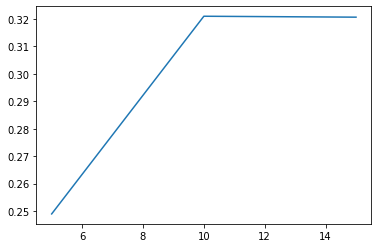

In [ ]:
# LDA Topic숫자가 유효한가요?? coh>0.5면 유효하다고 함. 
coh = []
# Compute Coherence Score
for i in range(len(lda_models)) :
  coherence_model_lda = CoherenceModel(model=lda_models[i], texts=text[i], dictionary=id2words[i], coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  coh.append(coherence_lda)

x = range(5,20,5)
y = coh
plt.plot(x,y)

In [ ]:
# 토픽당 10개(num_words) 단어를 가져옵니다.
topic_words = lda_models[1].print_topics(num_words = 10)
all_topics = []
for i in range(len(topic_words)) :
  topics = []
  for tok in topic_words[i][1].split('+') :
    tk = tok.split('*')[1]
    tk = tk.replace("\"","")
    tk = tk.replace(" ", "")
    topics.append(tk)
  all_topics.append(topics)

In [ ]:
all_topics

[['게임', '이', '때', '튀김', '점', '진짜', '것', '버그', '캐릭터', '제'],
 ['계정', '로그인', '게임', '제', '구글', '배', '문제', '배그', '유저', '좀'],
 ['게임', '좀', '때', '광고', '것', '이', '현질', '유저', '제', '플레이'],
 ['광고', '게임', '좀', '이', '진짜', '때', '거', '개', '점', '별'],
 ['게임', '과금', '유저', '것', '카드', '수', '현질', '업데이트', '수호', '때'],
 ['그', '게임', '광고', '이', '중', '또', '전체', '번만', '이용', '제대로'],
 ['게임', '때', '좀', '제', '것', '유저', '개', '점', '쿠키', '이'],
 ['팝', '소리', '게임', '리얼', '가면', '광고', '파일', '앱스토어', '수', '만족'],
 ['광고', '게임', '노래', '거', '진짜', '시간', '큐브', '제', '때', '마크'],
 ['게임', '채팅', '로그인', '것', '업데이트', '좀', '거', '사람', '점', '더']]

In [ ]:
# 리스트 저장하기
import csv
with open('/content/drive/MyDrive/munning_rachine/lda/lda_word.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  for row in all_topics:
    writer.writerow(row)